# Energy Disaggregation
### Extract Energy consumption time-series for the Pool-Pump

__Assumptions__
1. The Pool Pump starts and stops at fix timings everyday.
2. It maintains consistent power consumption during its operations.
3. Its Power rating is between 1000W to 3000W

#### Import required packages

In [229]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime

#### Read the energy-consumption CSV file into dataframe and converting energy(Wh) into Power(W)

In [443]:
csv_file = 'test_data.csv'
df = pd.read_csv(csv_file)
df['date'] = pd.to_datetime(df['epoch'],unit='s')
df['power'] = df['energy'] * 4
df.drop(['epoch', 'energy'], axis=1, inplace=True)
df.set_index('date', inplace=True)
df.head()

,power
date,
2016-11-03 07:00:00,328.0
2016-11-03 07:15:00,292.0
2016-11-03 07:30:00,296.0
2016-11-03 07:45:00,240.0
2016-11-03 08:00:00,176.0


#### Taking rolling average of 5, to smoothen out the noise

In [444]:
# rolling average to smoothen out the noise
df['power_SMA_5'] = df.loc[:,'power'].rolling(window=5).mean().round(2)
df.head()

,power,power_SMA_5
date,,
2016-11-03 07:00:00,328.0,NaN
2016-11-03 07:15:00,292.0,NaN
2016-11-03 07:30:00,296.0,NaN
2016-11-03 07:45:00,240.0,NaN
2016-11-03 08:00:00,176.0,266.4


#### Plot smoothened power for 10 consequetive days

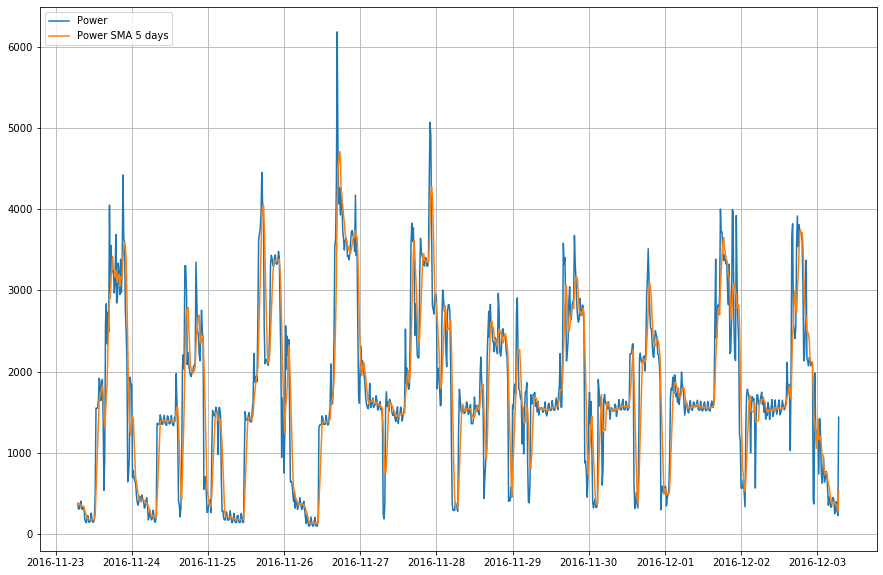

In [447]:
j = 20
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['power'][96*j:96*(j+10)],label='Power')
plt.plot(df['power_SMA_5'][96*j:96*(j+10)],label='Power SMA 5 days')
plt.legend(loc=2)
plt.show()

#### Take 1st derivative on smoothened power to generate power-delta series

In [452]:
df['diff1_SMA_5'] = df.loc[:,'power_SMA_5'].diff()
df.head(10)

,power,power_SMA_5,diff1_SMA_5
date,,,
2016-11-03 07:00:00,328.0,NaN,NaN
2016-11-03 07:15:00,292.0,NaN,NaN
2016-11-03 07:30:00,296.0,NaN,NaN
2016-11-03 07:45:00,240.0,NaN,NaN
2016-11-03 08:00:00,176.0,266.4,NaN
2016-11-03 08:15:00,180.0,236.8,-29.6
2016-11-03 08:30:00,276.0,233.6,-3.2
2016-11-03 08:45:00,260.0,226.4,-7.2
2016-11-03 09:00:00,148.0,208.0,-18.4


#### Plot power-delta series for 10 consequetive days

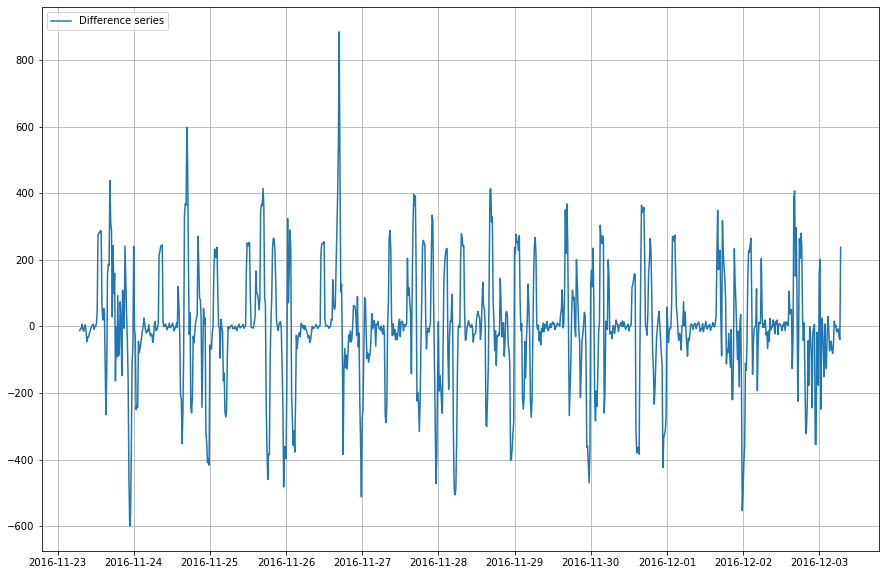

In [453]:
j = 20
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['diff1_SMA_5'][96*j:96*(j+10)],label='Difference series')
plt.legend(loc=2)
plt.show()

#### Plot power-delta series for individual days
**Estimate start-time and end-time of the pump when there is maximum power-delta in the +ve and -ve directions respectively**

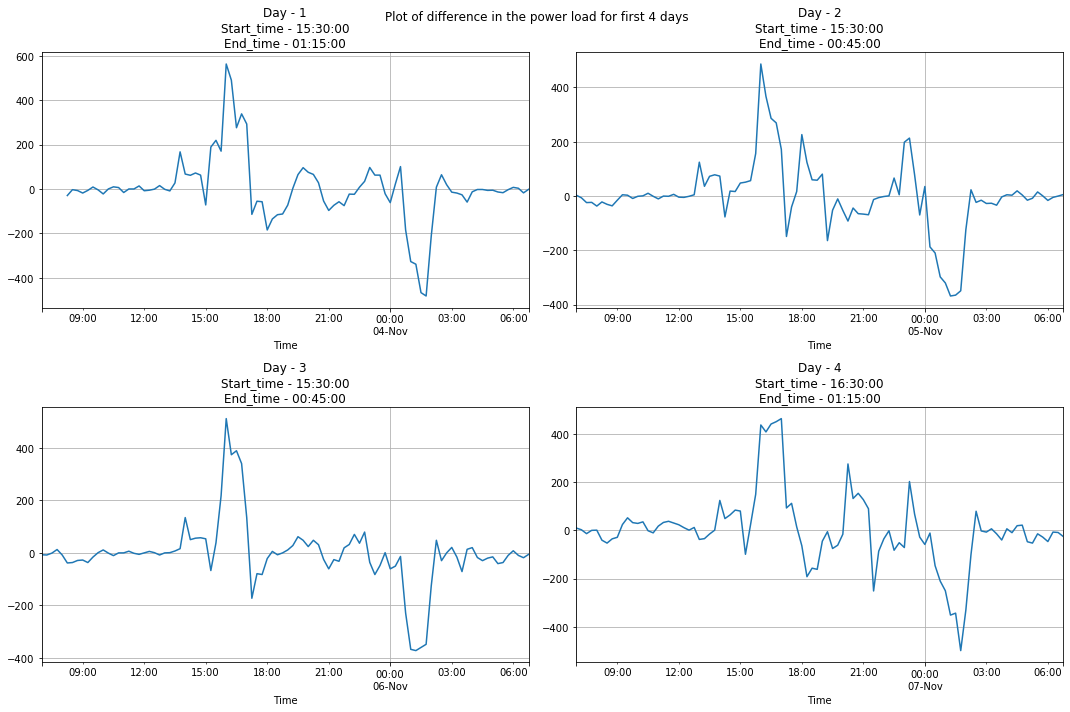

In [459]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,10])

for i in range(4):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    start_time = day_diff.index[day_diff.argmax()-2]
    end_time = day_diff.index[day_diff.argmin()-2]
    plt.subplot(2,2,i+1)
    day_diff.plot()
    plt.xlabel("Time")
    plt.grid()
    plt.title("Day - %d\nStart_time - %s\nEnd_time - %s" % (i+1, start_time.time(), end_time.time()))
#     ax.flatten()[i].plot(daday_diff)
# fig.text(0.5, 0.0, 'Date', ha='center')
plt.suptitle("Plot of difference in the power load for first 4 days")
plt.tight_layout()

#### Visualizing Power-data vis-a-vis estimated start-time and end-time of the pump

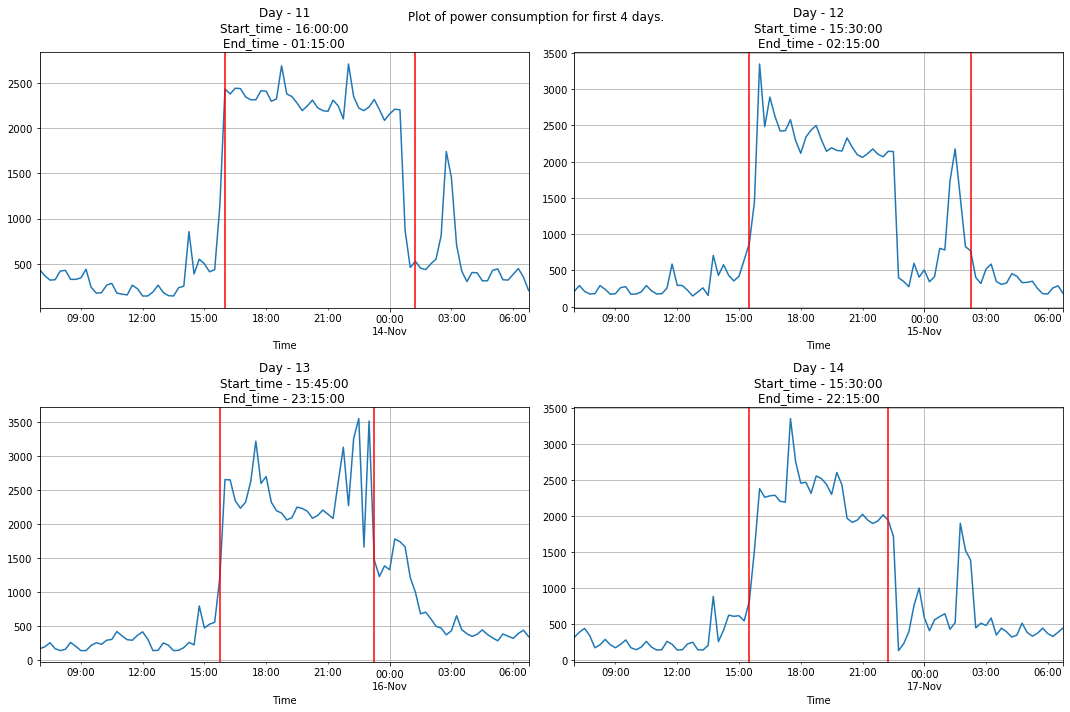

In [457]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,10])

k=10
for i in range(k, k+4):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    day_power = df['power'][96*i:96*(i+1)]
    start_time = day_diff.index[day_diff.argmax()-2]
    end_time = day_diff.index[day_diff.argmin()-2]
    plt.subplot(2,2,i+1-k)
    day_power.plot()
    plt.axvline(x=start_time, color='red'); plt.axvline(x=end_time, color='red')
    plt.xlabel("Time")
    plt.grid()
    plt.title("Day - %d\nStart_time - %s\nEnd_time - %s" % (i+1, start_time.time(), end_time.time()))

plt.suptitle("Plot of power consumption for first 4 days.")

plt.tight_layout()

#### Visualizing power-load patter - before Pump operation, during and after the pump is stopped.

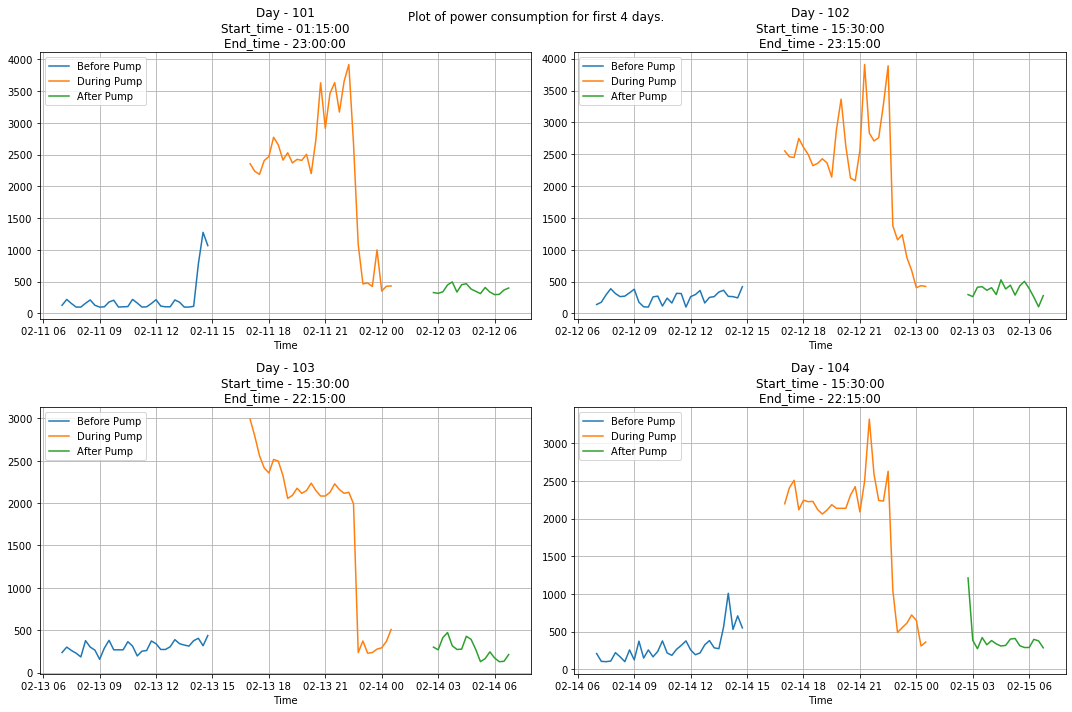

In [463]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,10])

k=100
for i in range(k,k+4):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    day_power = df['power'][96*i:96*(i+1)]
    start_time = day_diff.index[day_diff.argmax()-2]
    end_time = day_diff.index[day_diff.argmin()-2]
    plt.subplot(2,2,i+1-k)
    before_pump = day_power[:day1_diff.argmax()-4]; plt.plot(before_pump, label="Before Pump")
    during_pump = day_power[day1_diff.argmax()+4:day1_diff.argmin()-4]; plt.plot(during_pump, label="During Pump" )
    after_pump = day_power[day1_diff.argmin()+4:]; plt.plot(after_pump, label="After Pump" )
#     df['power_SMA_5'][96*i:96*(i+1)].plot()
    plt.xlabel("Time")
    plt.grid()
    plt.legend(loc=2)
    plt.title("Day - %d\nStart_time - %s\nEnd_time - %s" % (i+1, start_time.time(), end_time.time()))

plt.suptitle("Plot of power consumption for first 4 days.")
plt.tight_layout()

#### Datadrame of daily pump start and endtimes and average power-consumption before Pump operation, during and after the pump is stopped.

In [464]:
df_day = pd.DataFrame(columns=['Day', 'Pump_start_time', 'Pump_end_time', 
                               'before_pump_avgW', 'during_pump_avgW',
                              'after_pump_avgW'])
num_days = int(df.shape[0]/96)
for i in range(num_days):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    day_power = df['power'][96*i:96*(i+1)]
    
    start_time = day_diff.index[day_diff.argmax()-2].time()
    end_time = day_diff.index[day_diff.argmin()-2].time()
    
    before_pump = day_power[:day1_diff.argmax()-6]
    during_pump = day_power[day1_diff.argmax()+4:day1_diff.argmin()-4]
    after_pump = day_power[day1_diff.argmin()+6:]
    
    data_dict = {'Day':day_power.index[0].date(), 
           'Pump_start_time':start_time,
           'Pump_end_time':end_time,
           'before_pump_avgW':before_pump.mean().round(2),
           'during_pump_avgW':during_pump.mean().round(2),
           'after_pump_avgW':after_pump.mean().round(2)}
    df_day = df_day.append(data_dict, ignore_index=True)

In [465]:
df_day.head()

,Day,Pump_start_time,Pump_end_time,before_pump_avgW,during_pump_avgW,after_pump_avgW
0,2016-11-03,15:30:00,01:15:00,261.20,2437.94,406.93
1,2016-11-04,15:30:00,00:45:00,285.87,2435.35,389.33
2,2016-11-05,15:30:00,00:45:00,257.33,2270.32,258.93
3,2016-11-06,16:30:00,01:15:00,251.33,2775.10,454.67
4,2016-11-07,16:00:00,01:15:00,264.80,2343.74,617.87


In [275]:
df_day.to_csv('Df_Day.csv', index=False)

#### Based on the majority voting (highest frequency), choose the start and end timing of the pump across all days.

In [466]:
# Datadrame of global pump start and endtimes
df_day_global = pd.DataFrame(columns=['Day', 'Pump_start_time', 'Pump_end_time', 
                               'before_pump_avgW', 'during_pump_avgW',
                              'after_pump_avgW'])
num_days = int(df.shape[0]/96)
Pump_start_tab = df_day['Pump_start_time'].value_counts()
Pump_end_tab = df_day['Pump_end_time'].value_counts()

Pump_start_timeG = Pump_start_tab.index[0]
Pump_end_timeG = Pump_end_tab.index[0]

Pump_start_idx=pd.Series(df.index).apply(lambda x: x.time()==Pump_start_timeG).argmax()
Pump_end_idx=pd.Series(df.index).apply(lambda x: x.time()==Pump_end_timeG).argmax()

for i in range(num_days):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    day_power = df['power'][96*i:96*(i+1)]

    before_pump = day_power[:Pump_start_idx-2]
    during_pump = day_power[Pump_start_idx+2:
                            Pump_end_idx+2]
    after_pump = day_power[Pump_end_idx+8:]
    
    data_dict = {'Day':day_power.index[0].date(), 
           'Pump_start_time':Pump_start_timeG,
           'Pump_end_time':Pump_end_timeG,
           'before_pump_avgW':before_pump.mean().round(2),
           'during_pump_avgW':during_pump.mean().round(2),
           'after_pump_avgW':after_pump.mean().round(2)}
    df_day_global = df_day_global.append(data_dict, ignore_index=True)

In [467]:
df_day_global.head()

,Day,Pump_start_time,Pump_end_time,before_pump_avgW,during_pump_avgW,after_pump_avgW
0,2016-11-03,15:30:00,22:15:00,280.12,2528.15,670.52
1,2016-11-04,15:30:00,22:15:00,302.62,2418.81,574.96
2,2016-11-05,15:30:00,22:15:00,270.25,2316.59,477.93
3,2016-11-06,15:30:00,22:15:00,270.62,2797.48,738.67
4,2016-11-07,15:30:00,22:15:00,289.62,2266.52,814.22


In [295]:
df_day_global.to_csv('Df_Day_global.csv', index=False)

#### Visualizing power-load patter - before Pump operation, during and after the pump is stopped, at the global start and stop timings, caalculated above

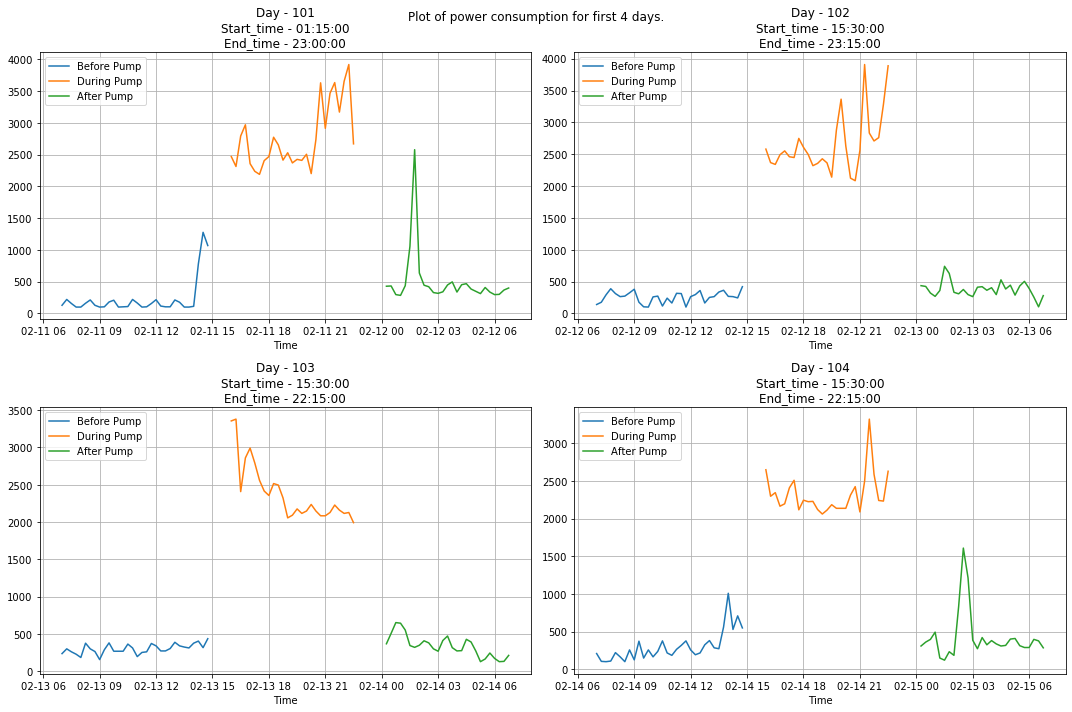

In [469]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,10])

k=100
for i in range(k,k+4):
    day_diff = df['diff1_SMA_5'][96*i:96*(i+1)]
    day_power = df['power'][96*i:96*(i+1)]
    start_time = day_diff.index[day_diff.argmax()-2]
    end_time = day_diff.index[day_diff.argmin()-2]
    plt.subplot(2,2,i+1-k)
    before_pump = day_power[:Pump_start_idx-2]; plt.plot(before_pump, label="Before Pump")
    during_pump = day_power[Pump_start_idx+2:Pump_end_idx+2]; plt.plot(during_pump, label="During Pump" )
    after_pump = day_power[Pump_end_idx+8:]; plt.plot(after_pump, label="After Pump" )
#     df['power_SMA_5'][96*i:96*(i+1)].plot()
    plt.xlabel("Time")
    plt.grid()
    plt.legend(loc=2)
    plt.title("Day - %d\nStart_time - %s\nEnd_time - %s" % (i+1, start_time.time(), end_time.time()))

plt.suptitle("Plot of power consumption for first 4 days.")
plt.tight_layout()

#### Remove the power values before and after the estimated pump operational timings , from the main series

In [473]:
df_2 = df['power'].copy().reset_index()
df_2['Day'] = df_2['date'].apply(lambda x: x.date())
df_2['Time'] = df_2['date'].apply(lambda x: x.time())
df_2 = df_2.drop('date', axis=1)

In [474]:
df_2['power_pump'] = df_2.apply(lambda x: 0.0 if x.Time < (datetime.datetime.combine(datetime.date.today(),Pump_start_timeG) + datetime.timedelta(minutes=30)).time()
                                        or x.Time > (datetime.datetime.combine(datetime.date.today(),Pump_end_timeG) + datetime.timedelta(minutes=30)).time()
                                        else x.power, axis=1)
df_2.head()

,power,Day,Time,power_pump
0,328.0,2016-11-03,07:00:00,0.0
1,292.0,2016-11-03,07:15:00,0.0
2,296.0,2016-11-03,07:30:00,0.0
3,240.0,2016-11-03,07:45:00,0.0
4,176.0,2016-11-03,08:00:00,0.0


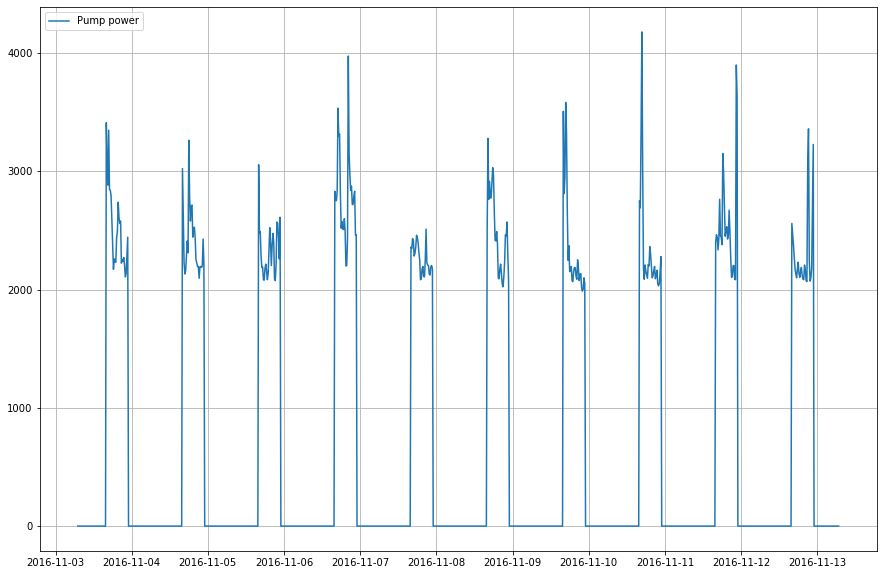

In [477]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df.index[:96*10], df_2['power_pump'][:96*10],label='Pump power')
plt.legend(loc=2)
plt.show()

#### Remove power-load of other appliance from the total power during (estimated) pump operational timings

In [478]:
def get_pump_power_day(data):
    power_during_median = data['power'].loc[(data['Time'] >= (datetime.datetime.combine(datetime.date.today(),Pump_start_timeG) + datetime.timedelta(minutes=30)).time())
                              & (data['Time'] <= (datetime.datetime.combine(datetime.date.today(),Pump_end_timeG) + datetime.timedelta(minutes=30)).time())].median()
    
    power_remaining_median = data['power'].loc[(data['Time'] < (datetime.datetime.combine(datetime.date.today(),Pump_start_timeG) + datetime.timedelta(minutes=30)).time())
                              | (data['Time'] > (datetime.datetime.combine(datetime.date.today(),Pump_end_timeG) + datetime.timedelta(minutes=30)).time())].median()
    return power_during_median - power_remaining_median
pump_power_s = df_2.groupby('Day').apply(get_pump_power_day)

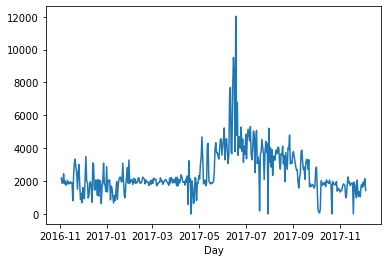

In [481]:
# Estimated pump power on daily basis
pump_power_s.plot()
plt.show()

#### Fix lower and upper limit of estimated pump-power series

In [482]:
lower_limit = max(pump_power_s.quantile(0.25), 1000)
upper_limit = min(pump_power_s.quantile(0.75), 3000)
print("Pump Power lower-limit - {}W, upper-limit - {}W".format(lower_limit, upper_limit))

Pump Power lower-limit - 1810.0W, upper-limit - 3000W


#### At any day, if estimated pump power is < lower-limit -> make it 0
#### If > upper-limit -> cap it to the upper-limit

In [483]:
def power_mod(data, lower_limit, upper_limit):
    if data < lower_limit:
        return 0.0
    elif data <= upper_limit:
        return data
    else:
        return upper_limit
pump_power_s = pump_power_s.apply(power_mod, args=(lower_limit, upper_limit))

In [484]:
df_2['power_pump_final'] = df_2.apply(lambda x: 0.0 if x.Time < (datetime.datetime.combine(datetime.date.today(),Pump_start_timeG) + datetime.timedelta(minutes=30)).time()
                                        or x.Time > (datetime.datetime.combine(datetime.date.today(),Pump_end_timeG) + datetime.timedelta(minutes=30)).time()
                                        else pump_power_s.loc[x.Day], axis=1)
df_2.head()

,power,Day,Time,power_pump,power_pump_final
0,328.0,2016-11-03,07:00:00,0.0,0.0
1,292.0,2016-11-03,07:15:00,0.0,0.0
2,296.0,2016-11-03,07:30:00,0.0,0.0
3,240.0,2016-11-03,07:45:00,0.0,0.0
4,176.0,2016-11-03,08:00:00,0.0,0.0


#### Extract Estimated Pump-power series and convert to the energy consumption

In [485]:
energy_pump_final = df_2['power_pump_final']/4
energy_pump_final.index = df.index
energy_pump_final.head()

date
2016-11-03 07:00:00    0.0
2016-11-03 07:15:00    0.0
2016-11-03 07:30:00    0.0
2016-11-03 07:45:00    0.0
2016-11-03 08:00:00    0.0
Name: power_pump_final, dtype: float64

#### Visualize first 10-day energy consumption of the pump 

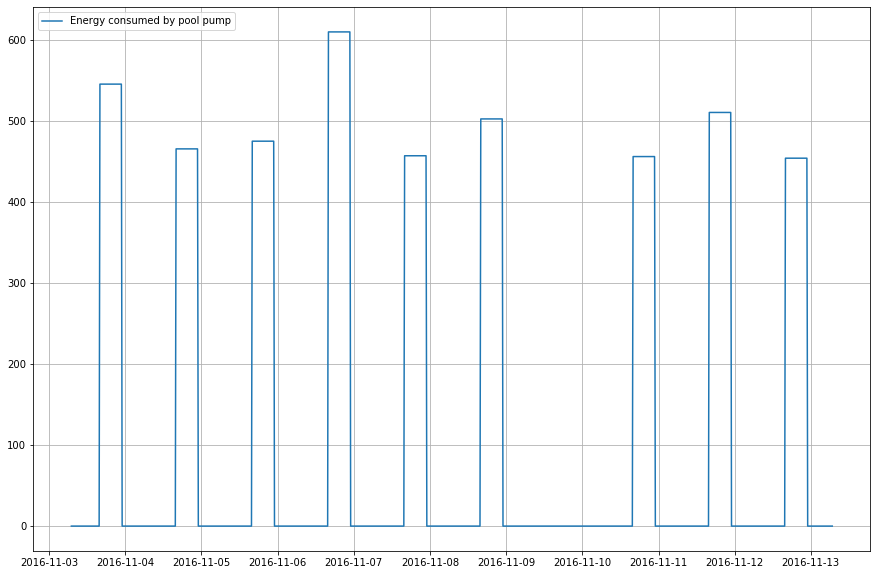

In [486]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(energy_pump_final[:96*10],label='Energy consumed by pool pump')
plt.legend(loc=2)
plt.show()

#### Save results into CSV file

In [488]:
energy_pump_final.to_csv("Pump_energy_series.csv")